## Dataset :

### Lending Club Loan Data 

#### Goal : With this Project, We'll try to Predict if a loan is going to be Default or NOT based on the data we have for previous Customers.

## Step 1: Data Loading & understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
from scipy.stats import randint
seed = 330
np.random.seed(seed)

In [2]:
df = pd.read_csv('loan.csv',low_memory= False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(887379, 74)

In [4]:
#Understand the columns in our dataset for feature engineering

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

#### ' As we can see our dataset has alot of missing values, let's take a look at the % of missing values from each column'

In [5]:
def null_values(df):
    
    miss_vals= df.isnull().sum() # calculate null values in each column
    miss_vals_percent =100 * df.isnull().sum() / len(df) #convert num of values to percentage of values
    #create a dataframe 
    miss_vals_table = pd.concat([miss_vals, miss_vals_percent], axis=1)
    
    mis_val_table_ren_columns = miss_vals_table.rename(
    columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})  #rename the columns in df
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            'Percent of Total Values', ascending=False).round(1)
    
    print("Dataframe has " + str(df.shape[1])+ " columns.\n"
           "There are " + str(mis_val_table_ren_columns.shape[0])+ " Columns that has missing values.")
    return mis_val_table_ren_columns

In [6]:

miss_vals = null_values(df) # apply the function on our dataframe
miss_vals.head(15)

Dataframe has 74 columns.
There are 40 Columns that has missing values.


,Missing Values,Percent of Total Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


### We notice that our dataset has a big percentage of missing values from almost 40 columns. We cannot work with columns that have too many missing values. So, we will have to remove all the columns that has missing values more than a certain threshold we shall set.

In [7]:
#check the total number of loans that have a status of default in our Target Column('loan_status')

Target_list = df['loan_status'].value_counts()

print('Default Loans: {}'.format(Target_list.Default))
      
print('Total Loans: {}'.format(Target_list.drop('Default').sum()))

Default Loans: 1219
Total Loans: 886160


### We have a case of an ' imbalanced class'  problem where the value of one  class is far less than the other.  There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

In [8]:
# Deal with the missing values in columns that are useful 

In [9]:
df['emp_length'].isna().sum()

44825

In [10]:
#Fill out Na Values with 0 to assume those people worked for less than a years

df['emp_length'].fillna(value=0,inplace=True)

In [11]:
#Use Regex to extract the absolute number of emp years without any (<,+) signs

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

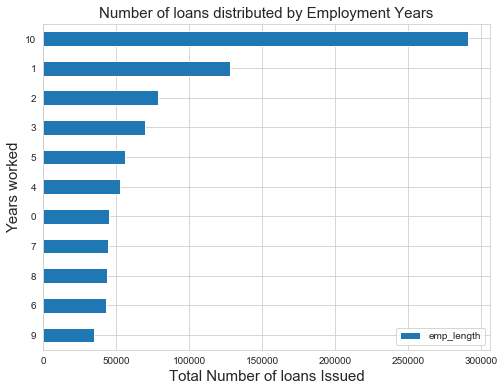

In [12]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',legend=True,figsize=(8,6))
plt.title('Number of loans distributed by Employment Years',fontsize=15)
plt.xlabel('Total Number of loans Issued',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

### This Plot above shows us that people who has been Employed for 10 Years are more likely to get a loan

#### Convert our Target column to two classes only (0 for Not default and 1 for Default)

In [13]:
target = [1 if i=='Default' else 0 for i in df['loan_status']]

In [14]:
#add new column to our dataset for Target variable

df["TARGET"]=target

In [15]:
#let's drop the column for loan_status as its not helpful anymore

df.drop('loan_status',axis=1,inplace=True)

In [16]:
df.dtypes.value_counts()

float64    49
object     22
int64       3
dtype: int64

In [17]:
# WE have quite a number of columns with datatype('object')

In [18]:
#check  how many categorical data do the columns having 'object' datatypes contain:

df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

term                              2
grade                             7
sub_grade                        35
emp_title                    299271
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                         103
pymnt_plan                        2
url                          887379
desc                         124469
purpose                          14
title                         63144
zip_code                        935
addr_state                       51
earliest_cr_line                697
initial_list_status               2
last_pymnt_d                     98
next_pymnt_d                    100
last_credit_pull_d              103
application_type                  2
verification_status_joint         3
dtype: int64

#### remove all the columns with more than 70% missing data as they won't be helping for modelling and exploration.

In [19]:
#calculate the threshold value

887379*0.30

266213.7

In [20]:
#Drop all columns which has more than 266213 NA's

df.dropna(axis=1,thresh=266213,inplace=True)

In [21]:
#Check the shape of dataset 


df.shape

(887379, 54)

In [22]:
#check the correlation of our feature columns with our target variable

df.corr()['TARGET'].sort_values(ascending=False).head(20)

TARGET                        1.000000
int_rate                      0.024485
out_prncp_inv                 0.013944
out_prncp                     0.013938
total_rec_late_fee            0.011758
total_rec_int                 0.010490
inq_last_6mths                0.006042
revol_util                    0.004831
dti                           0.003912
delinq_2yrs                   0.002777
open_acc                      0.002532
installment                   0.002273
funded_amnt_inv               0.002137
funded_amnt                   0.001989
loan_amnt                     0.001928
pub_rec                       0.001407
collections_12_mths_ex_med    0.000560
total_acc                     0.000178
mths_since_last_delinq        0.000135
acc_now_delinq               -0.000033
Name: TARGET, dtype: float64

In [23]:
df.corr()['dti'].sort_values().tail(10)

out_prncp      0.059319
revol_bal      0.067277
id             0.067781
member_id      0.067824
int_rate       0.079903
revol_util     0.087844
total_acc      0.108056
open_acc       0.144250
dti            1.000000
policy_code         NaN
Name: dti, dtype: float64

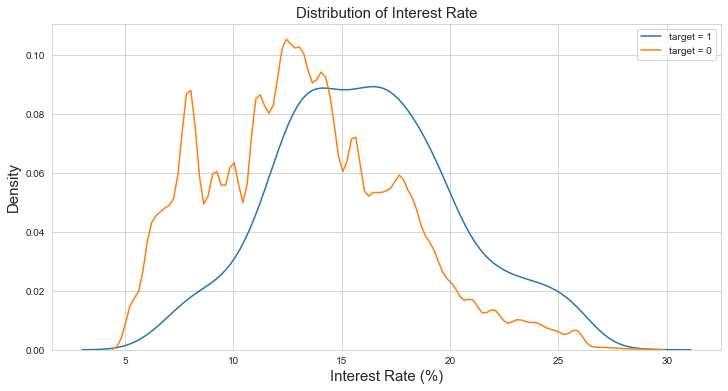

In [24]:
#lets take a look at kernel density distribution plot for Interest rates on (good loans VS bad loans)

fig = plt.figure(figsize=(12,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=15);

<Figure size 864x432 with 0 Axes>

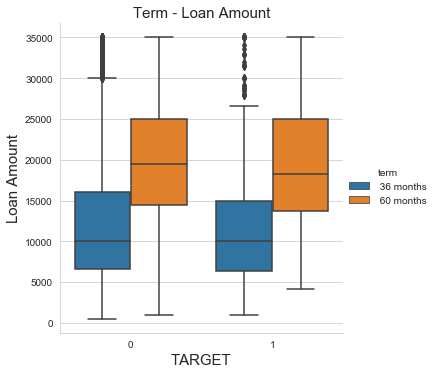

In [25]:
# BOX-plot of TARGET classes with distribution of loan amount differentiated by the terms.

fig = plt.figure(figsize=(12,6))
sns.catplot(x="TARGET",y="loan_amnt",data=df, hue="term",kind='box')
plt.title("Term - Loan Amount", fontsize=15)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

### 'It seems that a loan with higher amount tends to have longer terms'

## Step 2: Data Cleaning


As we  observed, some columns like annual_inc, int_rate, dti, etc. may be much useful for building our model but on the other hand, some columns like id, member_id, etc. will not be helping.


Also, columns like 'title' and 'emp_title' are text which cannot be one-hot encoded / label encoded as they have arbitrary categorical text and very less unique data for each of their categories.

In [26]:
df.drop(['id','member_id','emp_title','title','zip_code','url','policy_code','funded_amnt_inv','addr_state',
         'funded_amnt_inv','mths_since_last_delinq','next_pymnt_d'],axis=1,inplace=True)

In [27]:
df.shape

(887379, 43)

In [28]:
df.isna().sum().tail() # we still have some columns with alot of missing values

acc_now_delinq         29
tot_coll_amt        70276
tot_cur_bal         70276
total_rev_hi_lim    70276
TARGET                  0
dtype: int64

In [29]:
# our data is big enough so we can drop all rows with Na's

df.dropna(inplace=True) 
df.shape

(799139, 43)

### Convert date columns to integer number of years and months

In [30]:
#convert the issued date column to datetime and extract the Years only

df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))

In [31]:
#convert last payment date column to datetime and extract the Months 

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d']).apply(lambda x: int(x.strftime('%m')))

In [32]:
#convert the last credit pull column to datetime and extract the Months

df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d']).apply(lambda x: int(x.strftime('%m')))

In [33]:
#convert the column to datetime and extract the Months

df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line']).apply(lambda x: int(x.strftime('%m')))


In [34]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'TARGET'],
      dtype='object')

### Handle our categorical data 

If we only have two unique values for a categorical variable (such as Yes/No), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the better option.

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
#apply label encoding 

count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2: 
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count +=1
            print(col)
            
print('%d columns were label encoded.' % count )

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [37]:
#one hot encoding the rest of categorical columns

df = pd.get_dummies(df)
df.shape

(799139, 113)

In [38]:
df['TARGET'].value_counts()

0    797948
1      1191
Name: TARGET, dtype: int64

### We are left with decent amount of data for Modeling

For modeling i will use Random forests & XG Boost and compare them.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [40]:
# conduct train test split

from sklearn.model_selection import train_test_split

X = df.drop('TARGET',axis=1)
y = df['TARGET']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 101)

In [42]:
#Standarize the data using Standardscaler


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
# Our dataset is highly imbalanced, we use SMOTE to oversample our training set
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(sampling_strategy='minority' ,random_state=seed)

X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

In [44]:
X_resampled.shape

(1276656, 112)

In [45]:
#clf_rf = RandomForestClassifier(n_estimators=60,random_state= 101)
#clf_rf.fit(X_resampled,y_resampled)

In [46]:
#clf_rf_pred = clf_rf.predict(X_test)

In [47]:
# [[139557  20063]
 #[    16    192]]


    #          precision    recall  f1-score   support

  #         0       1.00      0.87      0.93    159620
  #         1       0.01      0.92      0.02       208

 #   accuracy                           0.87    159828
 #  macro avg       0.50      0.90      0.48    159828
#weighted avg       1.00      0.87      0.93    159828

In [48]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from scipy.stats import randint
import time


In [49]:
params_grid = {
    'max_depth': [8,10],
    'min_child_weight':[2,4],
    'n_estimators' : [10000],
    'n_jobs' : [5],
    'learning_rate' : [0.01,0.02],
    'gamma' : [0.07],
    #'max_delta_step': [2],
    'subsample' : [0.8],
    #'scale_pos_weight' : [0.07,0.10],
    'lambda' : [1,5],
    'alpha': [5,1],
    
     
    
}

In [50]:
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=seed)

In [51]:
fit_params = {"early_stopping_rounds":250, 
            "eval_metric" : ['auc','error'], 
            "eval_set" : [[X_test,y_test]]}

In [52]:
%time
params_fixed = {'objective' : 'binary:logistic'}

Wall time: 0 ns


In [53]:
gridsearch = GridSearchCV(estimator=XGBClassifier(**params_fixed,seed=seed),
                         param_grid=params_grid,
                         cv=cv,
                         scoring='accuracy',
                         
                         error_score=np.nan,
                          return_train_score=True,
                          verbose=100)



In [54]:
#%time gridsearch.fit(X_resampled,y_resampled,**fit_params)

gridsearch.best_params_

gridsearch.best_score_

preds = gridsearch.predict(X_test)

In [55]:
model = XGBClassifier(max_depth=8,
                      n_estimators=1000,
                     min_child_weight=2,
                     max_delta_step=0,
                      nthread = 4,
                      learning_rate=0.01,
                      subsample=0.8,
                      gamma=0.06,
                      scale_pos_weight=0.07,
                      reg_alpha=5,
                      reg_lambda=1
                  
                     )

In [56]:
%time model.fit(X_resampled,y_resampled, **fit_params,verbose=1000)

[0]	validation_0-auc:0.99518	validation_0-error:0.002891
Multiple eval metrics have been passed: 'validation_0-error' will be used for early stopping.

Will train until validation_0-error hasn't improved in 250 rounds.
Stopping. Best iteration:
[0]	validation_0-auc:0.99518	validation_0-error:0.002891

Wall time: 14min 28s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.06,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=5, reg_lambda=1, scale_pos_weight=0.07, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [66]:
preds = model.predict(X_test)

In [67]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159620
           1       0.31      0.99      0.47       208

    accuracy                           1.00    159828
   macro avg       0.65      0.99      0.73    159828
weighted avg       1.00      1.00      1.00    159828



In [68]:
print(confusion_matrix(y_test,preds))

[[159160    460]
 [     2    206]]


In [69]:
impt_feats = model.feature_importances_

In [70]:
from lightgbm import LGBMClassifier

In [71]:
model2 = LGBMClassifier(max_depth=8,
                      n_estimators=1000,
                     min_child_weight=5,
                     
                      nthread = 4,
                      learning_rate=0.02,
                      subsample=0.8,
                      
                      
                      reg_alpha=0.04,
                      reg_lambda=0.073,
                       num_leaves=35,
                       colsample_bytree=0.94,
                       min_split_gain=0.02
                  
                     )

In [72]:
%time model2.fit(X_resampled,y_resampled, **fit_params,verbose=1000)

Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.988903	valid_0's binary_logloss: 0.418715
Wall time: 56.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.94,
               importance_type='split', learning_rate=0.02, max_depth=8,
               min_child_samples=20, min_child_weight=5, min_split_gain=0.02,
               n_estimators=1000, n_jobs=-1, nthread=4, num_leaves=35,
               objective=None, random_state=None, reg_alpha=0.04,
               reg_lambda=0.073, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [73]:
preds2 = model2.predict(X_test)

In [74]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159620
           1       0.31      0.99      0.47       208

    accuracy                           1.00    159828
   macro avg       0.65      0.99      0.73    159828
weighted avg       1.00      1.00      1.00    159828

